In [955]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import norm

pd.set_option('display.max_rows', 40) # показывать больше строк
pd.set_option('display.max_columns', 30) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

## Цели и задачи проекта

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задачи:
Сформулировать предположения и гипотезы для дальнейшего построения модели.
Проверить качество данных и очистить их, если это необходимо.
Определиться с параметрами модели.

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [956]:
display(stud.head(40))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В нашем датасете 13 числовых столбцов и 17 строковых столбцов. Есть пропущенные данные во всех столбцах кроме первых трех.
Построим тепловую карту корреляционной зависимости и проверим, какие столбцы чересчур скоррелированы.

In [740]:
correl = stud.corr()
correl

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


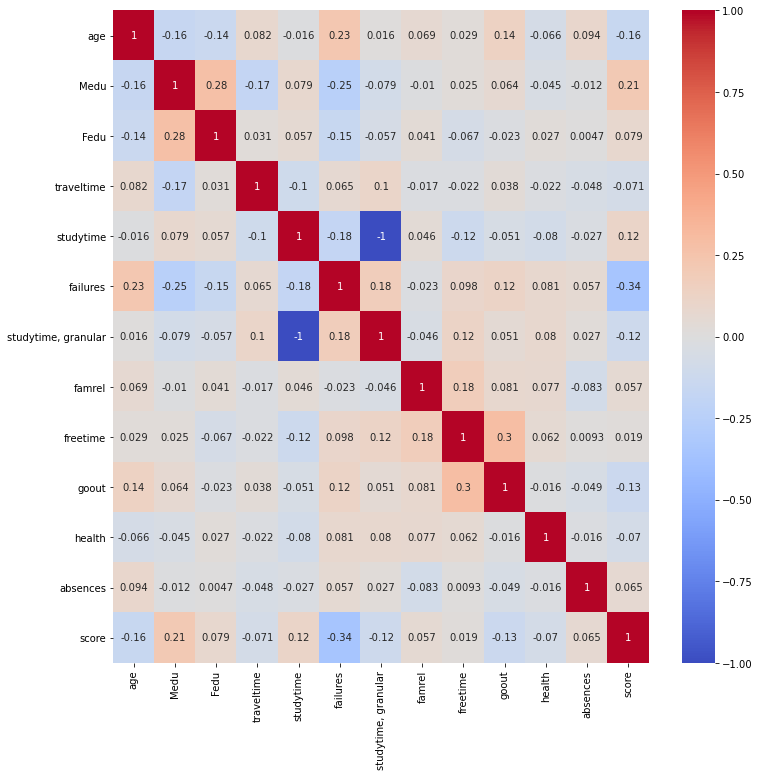

In [957]:
sns.heatmap(correl, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(12, 12)

В глаза бросается столбец 'studytime, granular'. Его нет даже в описании к данным. Удалим его.

In [958]:
del stud['studytime, granular']

In [959]:
correl2 = stud.corr()
correl2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


Проверим, что получилось.

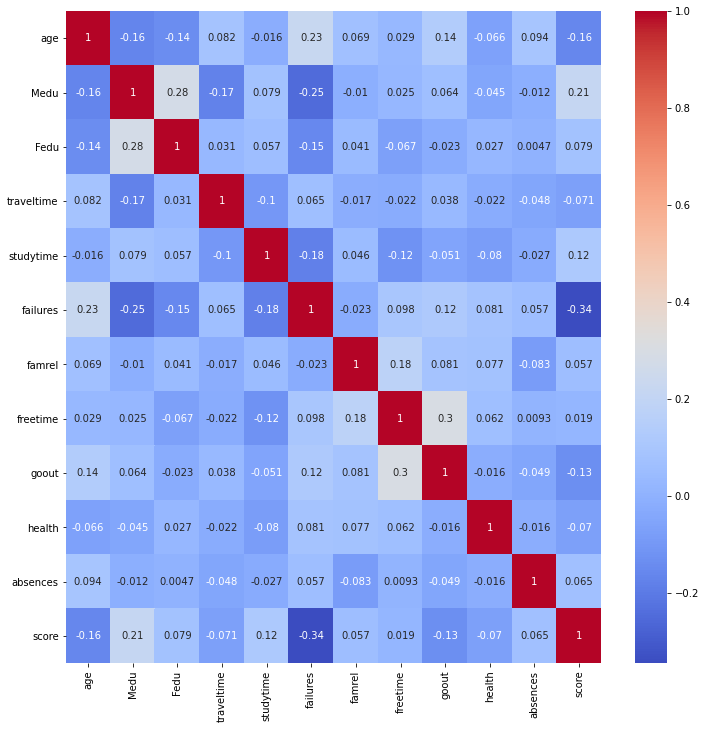

In [960]:
sns.heatmap(correl2, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(12, 12)

Теперь проанализируем каждый столбец нашего датасета.

## 1. Столбец school

In [961]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


Пропущенных значений нет. В датасете только две школы и название школы вряд ли влияет на результат. Однако, если в дальнейшем мы будем сравнивать школы по результатам, лучше этот столбец оставить.

## 2. Столбец sex

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

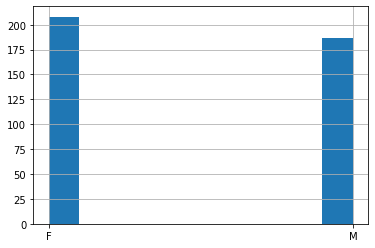

In [962]:
stud.sex.hist()
stud.sex.describe()

Девушек больше юношей, пропусков данных нет.

## 3. Столбец age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

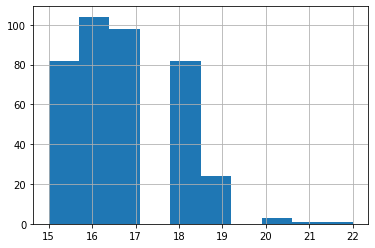

In [963]:
stud.age.hist()
stud.age.describe()

Проверим выбросы:

In [964]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)

In [965]:
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Есть выброс в возрасте. 22 года лежит за пределом верхней границы выброса. Проверим, сколько таких выбросов всего:

In [966]:
display(pd.DataFrame(stud.age.value_counts()))

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Такой выброс всего один. Его можно удалить:

In [967]:
stud = stud.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Проверим, что получилось

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

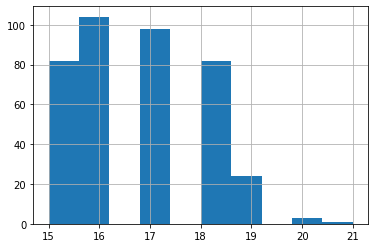

In [968]:
stud.age.hist()
stud.age.describe()

## 4. Столбец Address

count     377
unique      2
top         U
freq      294
Name: address, dtype: object

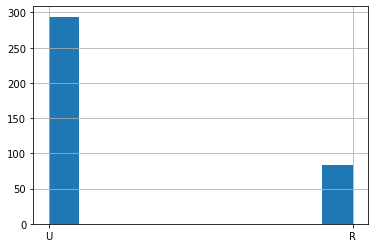

In [969]:
stud.address.hist()
stud.address.describe()

In [970]:
pd.DataFrame(stud.address.value_counts())

,address
U,294
R,83


По таблице видно, что городских больше, чем живущих за городом. Также видно, что есть пропуски в данных - 17 незаполненных строк по столбцу адрес. Но, скорее всего, эти данные не будут играть особую роль при анализе данных. Заменим пропуски на значение None.

In [1063]:
stud.address = stud.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.address = stud.address.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

Проверим, что получилось:

In [1064]:
pd.DataFrame(stud.address.value_counts())

,address
U,294
R,83
None,17


## 5. Столбец famsize

count     367
unique      2
top       GT3
freq      260
Name: famsize, dtype: object

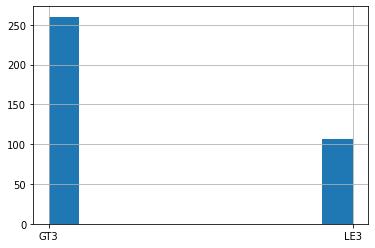

In [973]:
stud.famsize.hist()
stud.famsize.describe()

In [974]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,260
LE3,107


В основном в школе учатся ученики из семей с 3 и более членами семьи. Детей из неполных семей - 107. Есть пропущенные значения в количестве 27. Заменим пропущенные значеня на None:

In [976]:
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.famsize = stud.famsize.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [977]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,260
LE3,107
None,27


In [978]:
stud.famsize.describe()

count     394
unique      3
top       GT3
freq      260
Name: famsize, dtype: object

## 6. Cтолбец Pstatus

In [979]:
pd.DataFrame(stud.Pstatus.value_counts())

,Pstatus
T,313
A,36


count     349
unique      2
top         T
freq      313
Name: Pstatus, dtype: object

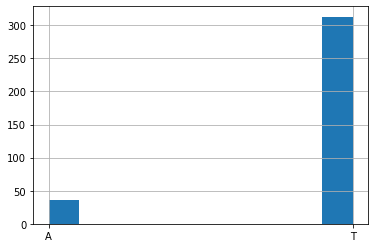

In [980]:
stud.Pstatus.hist()
stud.Pstatus.describe()

В основном родители живут совместно - 313. 36 живут раздельно. Информация о проживании родителей 45 семей отсутствует в датасете. Возможно это будет не критично. Заменим пропущенные значения на None:

In [984]:
stud.Pstatus = stud.Pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.Pstatus = stud.Pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [985]:
pd.DataFrame(stud.Pstatus.value_counts())

,Pstatus
T,313
None,45
A,36


## 7. Столбец Medu

Этот столбец числовой, посмотрим на него более внимательно.

In [986]:
stud.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


В столбце 3 пропуска.

In [987]:
display(pd.DataFrame(stud.Medu.value_counts()))

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

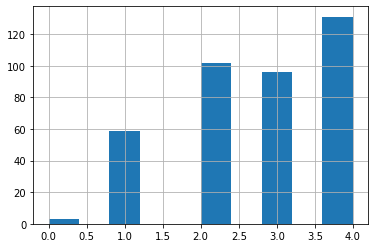

In [988]:
stud.Medu.hist()
stud.Medu.describe()

In [989]:
IQR = stud.Medu.quantile(0.75) - stud.Medu.quantile(0.25)
perc25 = stud.Medu.quantile(0.25)
perc75 = stud.Medu.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


Выбросов нет. Осталось только заменить пропущенные значения. Возможно пропущенные значения соответствуют людям не пожелавшим указать, что они без образования. Заменим их на нули.

In [990]:
stud.Medu = stud.Medu.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [991]:
display(pd.DataFrame(stud.Medu.value_counts()))

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,6


count    394.000000
mean       2.728426
std        1.121093
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

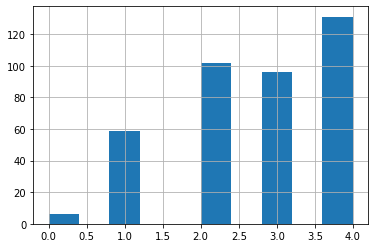

In [993]:
stud.Medu.hist()
stud.Medu.describe()

## 8. Столбец Fedu

In [994]:
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


Как видим, тут есть огромный выброс. Скорее всего это 4.0, просто люди ошиблись, когда вводили данные. Заменим его на нормальное значение.

In [995]:
def Fedu_norm(x):
    if x== 40.0:
        return 4.0
    else:
        return x
stud.Fedu = stud.Fedu.apply(Fedu_norm)

Проверим результат:

In [996]:
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,89
1.0,77
0.0,2


Теперь проверим выбросы.

In [997]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


Есть два выброса со значенимем 0. Удалять жалко, поэтому заменим эти нули на самое частое значение - 2. 

In [998]:
def Fedu_norm2(x):
    if x== 0.0:
        return 2.0
    else:
        return x
stud.Fedu = stud.Fedu.apply(Fedu_norm2)

Проверим, что получилось:

In [999]:
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
2.0,108
3.0,96
4.0,89
1.0,77


Теперь все хорошо, кроме большого количества пропущенных значений - 24. При анализе датасета в глаза бросается большая зависимость образования отца от образования матери. Попробуем заменить пустые значения данными из столбца Medu.

In [1000]:
stud.Fedu = stud.Fedu.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1001]:
def Fedu_norm3(x):
    if x== 0.0:
        return stud.Medu[x]
    else:
        return x
stud.Fedu = stud.Fedu.apply(Fedu_norm3)

In [1002]:
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
4.0,113
2.0,108
3.0,96
1.0,77


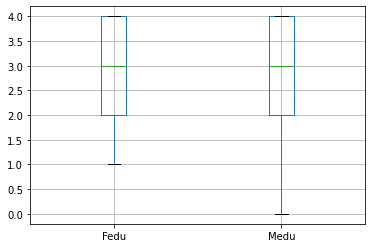

In [1003]:
boxplot = stud.boxplot(column=['Fedu', 'Medu'])

In [1004]:
stud.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


count    394.000000
mean       2.621827
std        1.096667
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Fedu, dtype: float64

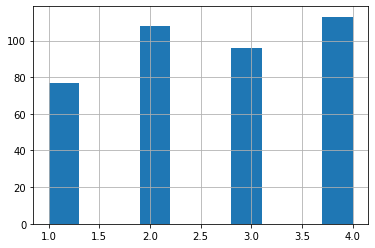

In [1005]:
stud.Fedu.hist()
stud.Fedu.describe()

Пропущенных значений больше нет. Можно переходить к следующему столбцу.

## 9. Столбец Mjob

count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

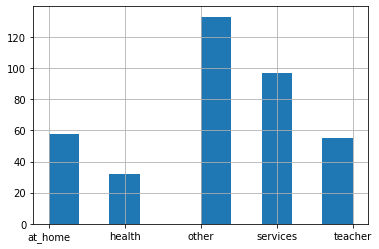

In [1006]:
stud.Mjob.hist()
stud.Mjob.describe()

In [1007]:
display(pd.DataFrame(stud.Mjob.value_counts()))

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


In [1008]:
stud.Mjob = stud.Mjob.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1009]:
def Mjob_norm(x):
    if x== 0:
        return 'other'
    else:
        return x
stud.Mjob = stud.Mjob.apply(Mjob_norm)

In [1010]:
display(pd.DataFrame(stud.Mjob.value_counts()))

,Mjob
other,152
services,97
at_home,58
teacher,55
health,32


Больше пропущенных значений нет, переходим к следующему столбцу.

## 10. Столбец Fjob

count       358
unique        5
top       other
freq        197
Name: Fjob, dtype: object

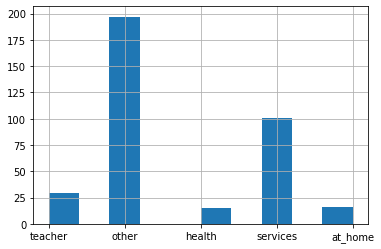

In [1011]:
stud.Fjob.hist()
stud.Fjob.describe()

In [1012]:
stud.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    358 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


Имеем 36 строк с пустыми значениями. Заменим эти значения на Other:

In [1013]:
stud.Fjob = stud.Fjob.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1014]:
def Fjob_norm(x):
    if x==0:
        return 'other'
    else:
        return x
stud.Fjob = stud.Fjob.apply(Fjob_norm)

In [1015]:
stud.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    394 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


Пропущенных значений больше нет, переходим к следующему столбцу.

## 10. Столбец reason

count        377
unique         4
top       course
freq         137
Name: reason, dtype: object

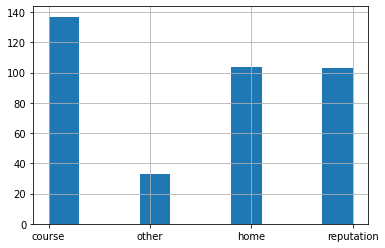

In [1016]:
stud.reason.hist()
stud.reason.describe()

Тут 17 пропущенных значений. Заменим их на причину other.

In [1017]:
stud.reason = stud.reason.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1018]:
def reason_norm(x):
    if x==0:
        return 'other'
    else:
        return x
stud.reason = stud.reason.apply(reason_norm)

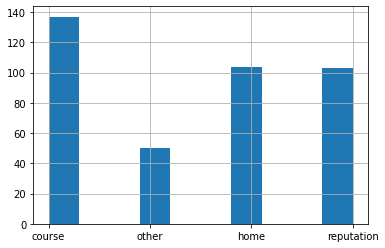

In [1019]:
stud.reason.hist()

In [1020]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  394 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


## 11. Столбец guardian

count        363
unique         3
top       mother
freq         249
Name: guardian, dtype: object

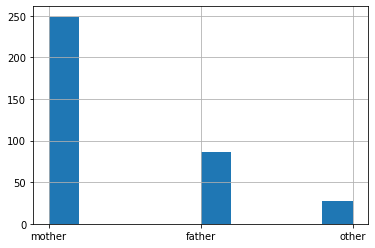

In [1021]:
stud.guardian.hist()
stud.guardian.describe()

Тут пропущенных значений 31. Заменим пропуски на самое частое значение.

In [1022]:
stud.guardian = stud.guardian.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1023]:
def guardian_norm(x):
    if x==0:
        return 'mother'
    else:
        return x
stud.guardian = stud.guardian.apply(guardian_norm)

## 12. Столбец traveltime

Столбец числовой. Посмотрим подробнее.

In [1024]:
stud.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


28 пропусков. Посмотрим на график.

count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

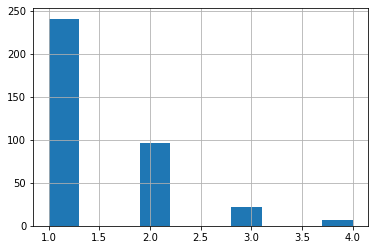

In [1025]:
stud.traveltime.hist()
stud.traveltime.describe()

В основном студенты живут близко от школы. Проверим выбросы.

In [1026]:
IQR = stud.traveltime.quantile(0.75) - stud.traveltime.quantile(0.25)
perc25 = stud.traveltime.quantile(0.25)
perc75 = stud.traveltime.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


Есть выброс. Посмотрим, сколько таких выбросов.

In [1027]:
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,241
2.0,96
3.0,22
4.0,7


Ничего страшного не случится, если мы их переведем в группу, которые едут в школу не более часа.

In [1028]:
def traveltime_norm(x):
    if x==4.0:
        return 3.0
    else:
        return x
stud.traveltime = stud.traveltime.apply(traveltime_norm)

In [1029]:
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,241
2.0,96
3.0,29


Осталось убрать пропущенные значения. "Поселим" их рядом со школой, так как большая часть живет рядом с ней.

In [1067]:
stud.traveltime = stud.traveltime.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)
def traveltime_norm2(x):
    if x==0:
        return 1.0
    else:
        return x
stud.traveltime = stud.traveltime.apply(traveltime_norm2)

In [1068]:
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,269
2.0,96
3.0,29


## 13. Столбец studytime

Очень важный столбец, так как он влияет на конечный результат.

In [1030]:
stud.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


Пропущенных значений всего 7. Это хорошо!

count    387.000000
mean       2.041344
std        0.841505
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

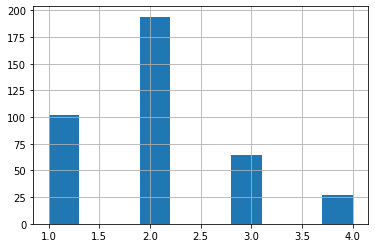

In [1031]:
stud.studytime.hist()
stud.studytime.describe()

Проверим выбросы:

In [1032]:
IQR = stud.studytime.quantile(0.75) - stud.studytime.quantile(0.25)
perc25 = stud.studytime.quantile(0.25)
perc75 = stud.studytime.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [1033]:
display(pd.DataFrame(stud.studytime.value_counts()))

,studytime
2.0,194
1.0,102
3.0,64
4.0,27


Устраним выбросы, переведя студентов с 4.0 на 3.0

In [1034]:
def studytime_norm2(x):
    if x==4.0:
        return 3.0
    else:
        return x
stud.studytime = stud.studytime.apply(studytime_norm2)

In [1035]:
display(pd.DataFrame(stud.studytime.value_counts()))

,studytime
2.0,194
1.0,102
3.0,91


Пропущенные значения заполним средним значением - 2.

In [1036]:
stud.studytime = stud.studytime.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)
def studytime_norm(x):
    if x==0:
        return 1.0
    else:
        return x
stud.studytime = stud.studytime.apply(studytime_norm)

In [1037]:
stud.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


## 14. Столбец failures

In [1038]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


22 пропуска.

count    372.000000
mean       0.330645
std        0.731152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

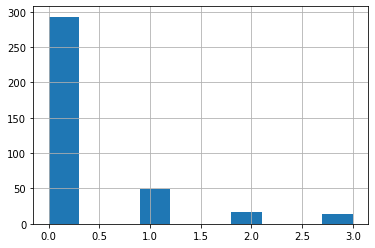

In [1039]:
stud.failures.hist()
stud.failures.describe()

In [1040]:
IQR = stud.failures.quantile(0.75) - stud.failures.quantile(0.25)
perc25 = stud.failures.quantile(0.25)
perc75 = stud.failures.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


In [1041]:
display(pd.DataFrame(stud.failures.value_counts()))

,failures
0.0,293
1.0,49
2.0,16
3.0,14


Избавимся от выбросов. Заменим значения 2.0 и 3.0 на 1.0.

In [1042]:
def failures_norm(x):
    if x==2.0 :
        return 1.0
    elif x==3.0 :
        return 1.0
    else:
        return x
stud.failures = stud.failures.apply(failures_norm)

In [1043]:
display(pd.DataFrame(stud.failures.value_counts()))

,failures
0.0,293
1.0,79


Заполним пропуски, присвоив им самое частое значение - 0

In [1044]:
stud.failures = stud.failures.apply(lambda x: 5 if pd.isnull(x) else 5 if x == 'nan' else x)
def failures_norm(x):
    if x==5:
        return 0
    else:
        return x
stud.failures = stud.failures.apply(failures_norm)

In [1045]:
display(pd.DataFrame(stud.failures.value_counts()))

,failures
0.0,315
1.0,79


## 15. Столбец schoolsup

In [1046]:
stud.loc[:, ['schoolsup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


9 пропусков

In [1047]:
display(pd.DataFrame(stud.schoolsup.value_counts()))

,schoolsup
no,334
yes,51


Заменим пропуски на "no" так как пропусков немного.

In [1048]:
stud.schoolsup = stud.schoolsup.apply(lambda x: 5 if pd.isnull(x) else 5 if x == 'nan' else x)
def schoolsup_norm(x):
    if x==5:
        return 'no'
    else:
        return x
stud.schoolsup = stud.schoolsup.apply(schoolsup_norm)

In [1049]:
display(pd.DataFrame(stud.schoolsup.value_counts()))

,schoolsup
no,343
yes,51


count     394
unique      2
top        no
freq      343
Name: schoolsup, dtype: object

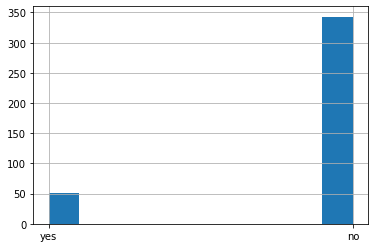

In [835]:
stud.schoolsup.hist()
stud.schoolsup.describe()

## 16. Столбец famsup

In [1050]:
stud.loc[:, ['famsup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


39 пропусков. Довольно много. Заменим пропуски на None

In [1053]:
stud.famsup = stud.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.famsup = stud.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top       yes
freq      219
Name: famsup, dtype: object

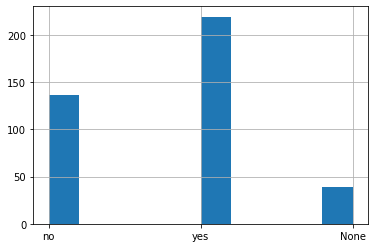

In [1054]:
stud.famsup.hist()
stud.famsup.describe()

In [1055]:
display(pd.DataFrame(stud.famsup.value_counts()))

,famsup
yes,219
no,136
None,39


## 17. Столбец paid

In [1056]:
stud.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


40 попусков. Заменим на None

In [1059]:
stud.paid = stud.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.paid = stud.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top        no
freq      199
Name: paid, dtype: object

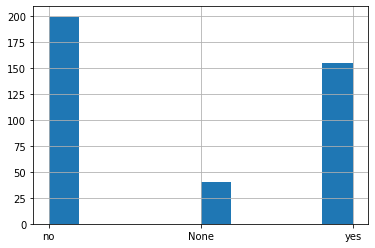

In [1060]:
stud.paid.hist()
stud.paid.describe()

In [1061]:
display(pd.DataFrame(stud.paid.value_counts()))

,paid
no,199
yes,155
None,40


## 18. Столбец activities

In [1070]:
stud.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


14 пропущенных значений

In [1072]:
stud.activities = stud.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.activities = stud.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top       yes
freq      195
Name: activities, dtype: object

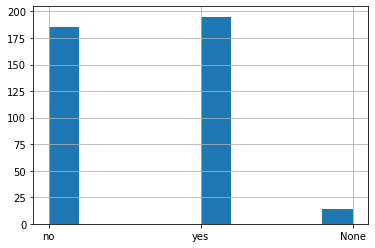

In [1073]:
stud.activities.hist()
stud.activities.describe()

## 19. Столбец nursery

In [1074]:
stud.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


count     378
unique      2
top       yes
freq      300
Name: nursery, dtype: object

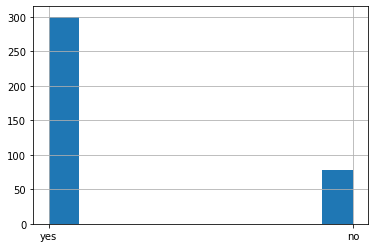

In [1075]:
stud.nursery.hist()
stud.nursery.describe()

Заменим пропущенные значения на None.

In [1077]:
stud.nursery = stud.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.nursery = stud.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top       yes
freq      300
Name: nursery, dtype: object

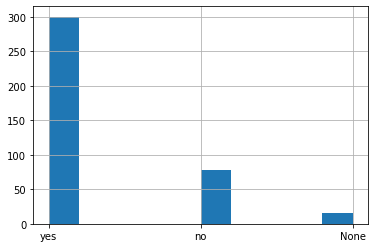

In [1078]:
stud.nursery.hist()
stud.nursery.describe()

## 20. Столбец higher

In [1079]:
stud.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


Заменим пропущенные значения на None

In [1081]:
stud.higher = stud.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.higher = stud.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top       yes
freq      356
Name: higher, dtype: object

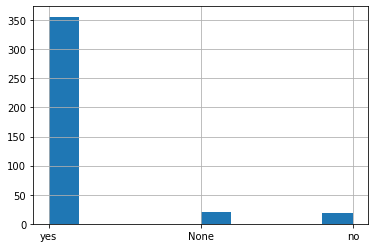

In [1082]:
stud.higher.hist()
stud.higher.describe()

## 21. Столбец internet

In [1083]:
stud.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


Заменим пропуски на None

In [1085]:
stud.internet = stud.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.internet = stud.internet.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top       yes
freq      304
Name: internet, dtype: object

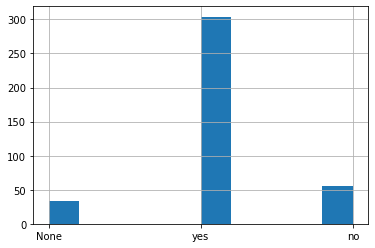

In [1086]:
stud.internet.hist()
stud.internet.describe()

## 22. Столбец romantic

In [1087]:
stud.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


Заменим пропуски на None

In [1090]:
stud.romantic = stud.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud.romantic = stud.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

count     394
unique      3
top        no
freq      240
Name: romantic, dtype: object

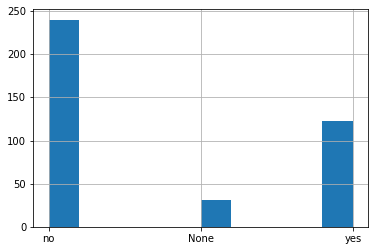

In [1091]:
stud.romantic.hist()
stud.romantic.describe()

## 23. Столбец famrel

In [1092]:
stud.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


27 пропущенных значений. Много.

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

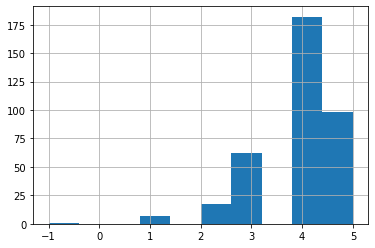

In [1093]:
stud.famrel.hist()
stud.famrel.describe()

Нашелся выброс в виде -1. Возможно человек ошибся вводя данные. Заменим -1 на 1.

In [1094]:
def famrel_norm(x):
    if x==-1:
        return 1
    else:
        return x
stud.famrel = stud.famrel.apply(famrel_norm)

count    367.000000
mean       3.940054
std        0.903365
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

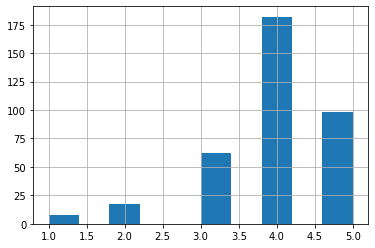

In [1095]:
stud.famrel.hist()
stud.famrel.describe()

Проверим другие выбросы.

In [1096]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


In [1097]:
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,8


Удалим выброс, переведя добавив значения 1.0 к 2.0

In [1098]:
def famrel_norm2(x):
    if x==1.0:
        return 2.0
    else:
        return x
stud.famrel = stud.famrel.apply(famrel_norm2)

In [1099]:
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,182
5.0,98
3.0,62
2.0,25


In [1100]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


Пропущенные значения заменим на самое частое - 4.0

In [1101]:
stud.famrel = stud.famrel.apply(lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)

In [1102]:
def famrel_norm3(x):
    if x==0:
        return 4.0
    else:
        return x
stud.famrel = stud.famrel.apply(famrel_norm3)

In [1103]:
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,209
5.0,98
3.0,62
2.0,25


## 24. Столбец freetime

In [1105]:
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  383 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


11 пропущенных значений

count    383.000000
mean       3.229765
std        0.994462
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

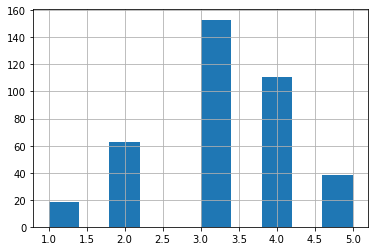

In [1106]:
stud.freetime.hist()
stud.freetime.describe()

In [1107]:
IQR = stud.freetime.quantile(0.75) - stud.freetime.quantile(0.25)
perc25 = stud.freetime.quantile(0.25)
perc75 = stud.freetime.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


In [1108]:
display(pd.DataFrame(stud.freetime.value_counts()))

,freetime
3.0,153
4.0,111
2.0,63
5.0,38
1.0,18


Выброс 1.0 не будем удалять из таблицы, а переведем на 1 уровень выше. Таким образом удалим этот выброс.

In [1109]:
def freetime_norm(x):
    if x==1.0:
        return 2.0
    else:
        return x
stud.freetime = stud.freetime.apply(freetime_norm)

In [1110]:
display(pd.DataFrame(stud.freetime.value_counts()))

,freetime
3.0,153
4.0,111
2.0,81
5.0,38


In [1111]:
IQR = stud.freetime.quantile(0.75) - stud.freetime.quantile(0.25)
perc25 = stud.freetime.quantile(0.25)
perc75 = stud.freetime.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


11 пропущенных значений заменим частовстречающимся значением - 3.0

In [1112]:
stud.freetime = stud.freetime.apply(lambda x: 10 if pd.isnull(x) else 10 if x == 'nan' else x)
def freetime_norm2(x):
    if x==10:
        return 3.0
    else:
        return x
stud.freetime = stud.freetime.apply(freetime_norm2)

In [1113]:
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


## 25. Столбец goout

In [1114]:
stud.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   386 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


8 пропущенных значений

count    386.000000
mean       3.101036
std        1.113156
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

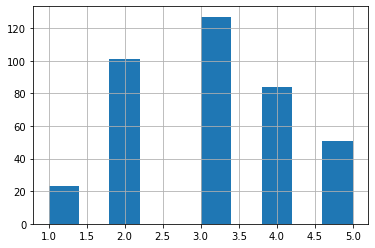

In [1115]:
stud.goout.hist()
stud.goout.describe()

In [1116]:
IQR = stud.goout.quantile(0.75) - stud.goout.quantile(0.25)
perc25 = stud.goout.quantile(0.25)
perc75 = stud.goout.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


Выбросов нет. А 8 пропущенных значений заменим частым значением - 3.0

In [1117]:
stud.goout = stud.goout.apply(lambda x: 10 if pd.isnull(x) else 10 if x == 'nan' else x)
def goout_norm(x):
    if x==10:
        return 3.0
    else:
        return x
stud.goout = stud.goout.apply(goout_norm)

In [1118]:
display(pd.DataFrame(stud.goout.value_counts()))

,goout
3.0,135
2.0,101
4.0,84
5.0,51
1.0,23


count    394.000000
mean       3.098985
std        1.101860
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

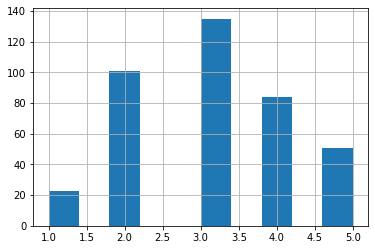

In [1119]:
stud.goout.hist()
stud.goout.describe()

## 26. Столбец health

In [1120]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  379 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


15 пустых значений

count    379.000000
mean       3.538259
std        1.391770
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

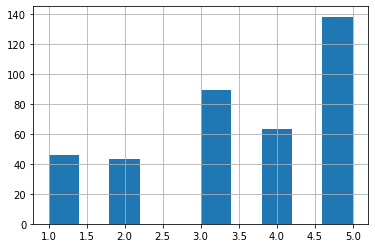

In [1121]:
stud.health.hist()
stud.health.describe()

Заменим 11 пустых значений самым частым значением - 5.0

In [1122]:
stud.health = stud.health.apply(lambda x: 10 if pd.isnull(x) else 10 if x == 'nan' else x)
def health_norm(x):
    if x==10:
        return 5.0
    else:
        return x
stud.health = stud.health.apply(health_norm)

count    394.000000
mean       3.593909
std        1.393392
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

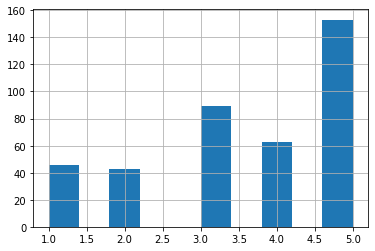

In [1123]:
stud.health.hist()
stud.health.describe()

In [1124]:
IQR = stud.health.quantile(0.75) - stud.health.quantile(0.25)
perc25 = stud.health.quantile(0.25)
perc75 = stud.health.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


Выбросов нет.

## 27. Столбец absences

In [1125]:
stud.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  382 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


12 пустых значений

count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

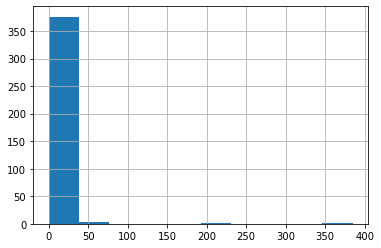

In [1126]:
stud.absences.hist()
stud.absences.describe()

Проверим выбросы

In [1127]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Заменим самые большие выбросы средним значением - 7

In [1128]:
def absences_norm(x):
    if x==385.0:
        return 7.0
    elif x==212.0:
        return 7.0
    else:
        return x
stud.absences = stud.absences.apply(absences_norm)

Проверим выбросы еще раз.

In [1129]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


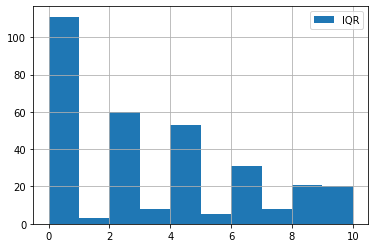

In [1130]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Удалим выбросы.

In [1131]:
stud2 = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    367.000000
mean       4.585831
std        4.925967
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

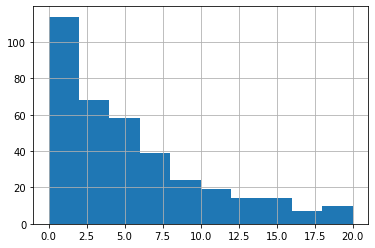

In [1132]:
stud2.absences.hist()
stud2.absences.describe()

## 28. Столбец score

Важный столбец. Посмотрим на данные.

In [1133]:
stud2.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   362 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


После удаления данных в предыдущем столбце, осталось 367 строк. Также осталось 5 пустых значений. Удалим их.

In [1135]:
stud2.score = stud2.score.apply(lambda x: -1 if pd.isnull(x) else -1 if x == 'nan' else x)
def score_norm(x):
    if x==-1:
        return 0
    else:
        return x
stud2.score = stud2.score.apply(score_norm)

count    367.000000
mean       3.618529
std        1.377606
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: score, dtype: float64

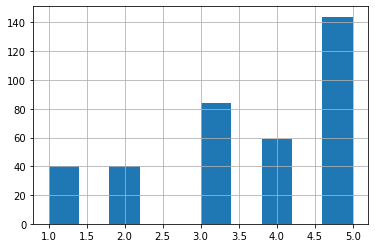

In [1136]:
stud2.score.hist()
stud2.score.describe()

In [1138]:
display(pd.DataFrame(stud2.score.value_counts()))

,score
5.0,144
3.0,84
4.0,59
2.0,40
1.0,40


In [1139]:
IQR = stud2.score.quantile(0.75) - stud2.score.quantile(0.25)
perc25 = stud2.score.quantile(0.25)
perc75 = stud2.score.quantile(0.75)
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


Выбросов нет.

In [1140]:
stud2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      367 non-null    object 
 1   sex         367 non-null    object 
 2   age         367 non-null    int64  
 3   address     367 non-null    object 
 4   famsize     367 non-null    object 
 5   Pstatus     367 non-null    object 
 6   Medu        367 non-null    float64
 7   Fedu        367 non-null    float64
 8   Mjob        367 non-null    object 
 9   Fjob        367 non-null    object 
 10  reason      367 non-null    object 
 11  guardian    367 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   367 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   367 non-null    object 
 16  famsup      367 non-null    object 
 17  paid        367 non-null    object 
 18  activities  367 non-null    object 
 19  nursery     367 non-null    o

## Корреляционный анализ

In [1141]:
correl3 = stud2.corr()
correl3

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.186951,-0.181582,0.102870,0.050403,0.242736,0.058240,0.055268,0.124409,-0.036898,0.130520,-0.036898
Medu,-0.186951,1.000000,0.595755,-0.155289,0.102652,-0.257329,-0.013572,0.010560,0.049521,-0.058809,0.063501,-0.058809
Fedu,-0.181582,0.595755,1.000000,-0.143669,0.065017,-0.236825,-0.035187,-0.004313,0.028926,0.003889,0.001655,0.003889
traveltime,0.102870,-0.155289,-0.143669,1.000000,-0.108647,0.038927,-0.018305,-0.014431,0.026207,-0.044253,-0.042542,-0.044253
studytime,0.050403,0.102652,0.065017,-0.108647,1.000000,-0.141254,0.059104,-0.124771,-0.024374,-0.074895,-0.080322,-0.074895
failures,0.242736,-0.257329,-0.236825,0.038927,-0.141254,1.000000,-0.002397,0.113102,0.066406,0.129576,0.128285,0.129576
famrel,0.058240,-0.013572,-0.035187,-0.018305,0.059104,-0.002397,1.000000,0.154583,0.090298,0.083491,-0.088980,0.083491
freetime,0.055268,0.010560,-0.004313,-0.014431,-0.124771,0.113102,0.154583,1.000000,0.285626,0.048296,0.086246,0.048296
goout,0.124409,0.049521,0.028926,0.026207,-0.024374,0.066406,0.090298,0.285626,1.000000,0.016417,0.098289,0.016417
health,-0.036898,-0.058809,0.003889,-0.044253,-0.074895,0.129576,0.083491,0.048296,0.016417,1.000000,-0.009254,1.000000


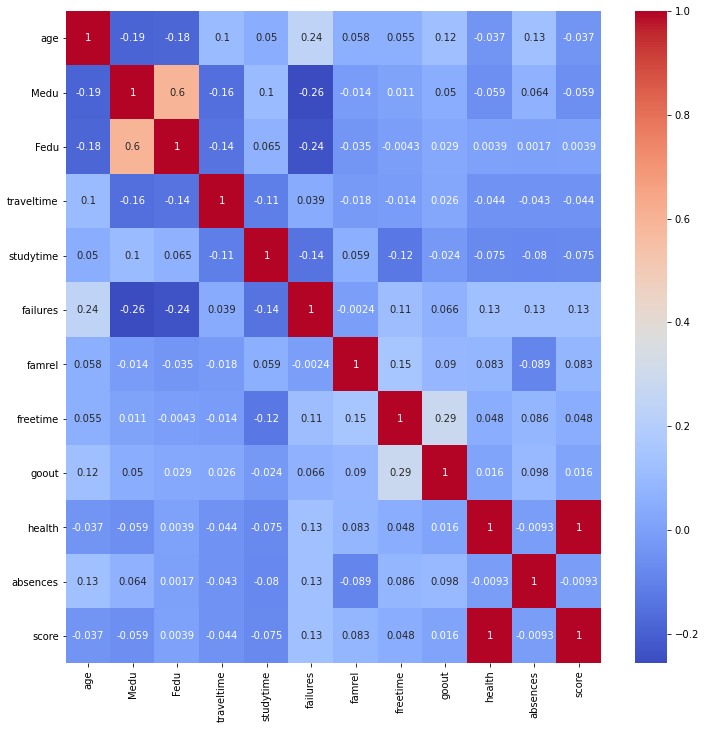

In [1142]:
sns.heatmap(correl3, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(12, 12)

Довольно сильно скоррелирован столбики health и score. Удалим health и проверим результат.

In [1143]:
del stud2['health']

In [1144]:
correl4 = stud2.corr()
correl4

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,absences,score
age,1.000000,-0.186951,-0.181582,0.102870,0.050403,0.242736,0.058240,0.055268,0.124409,0.130520,-0.036898
Medu,-0.186951,1.000000,0.595755,-0.155289,0.102652,-0.257329,-0.013572,0.010560,0.049521,0.063501,-0.058809
Fedu,-0.181582,0.595755,1.000000,-0.143669,0.065017,-0.236825,-0.035187,-0.004313,0.028926,0.001655,0.003889
traveltime,0.102870,-0.155289,-0.143669,1.000000,-0.108647,0.038927,-0.018305,-0.014431,0.026207,-0.042542,-0.044253
studytime,0.050403,0.102652,0.065017,-0.108647,1.000000,-0.141254,0.059104,-0.124771,-0.024374,-0.080322,-0.074895
failures,0.242736,-0.257329,-0.236825,0.038927,-0.141254,1.000000,-0.002397,0.113102,0.066406,0.128285,0.129576
famrel,0.058240,-0.013572,-0.035187,-0.018305,0.059104,-0.002397,1.000000,0.154583,0.090298,-0.088980,0.083491
freetime,0.055268,0.010560,-0.004313,-0.014431,-0.124771,0.113102,0.154583,1.000000,0.285626,0.086246,0.048296
goout,0.124409,0.049521,0.028926,0.026207,-0.024374,0.066406,0.090298,0.285626,1.000000,0.098289,0.016417
absences,0.130520,0.063501,0.001655,-0.042542,-0.080322,0.128285,-0.088980,0.086246,0.098289,1.000000,-0.009254


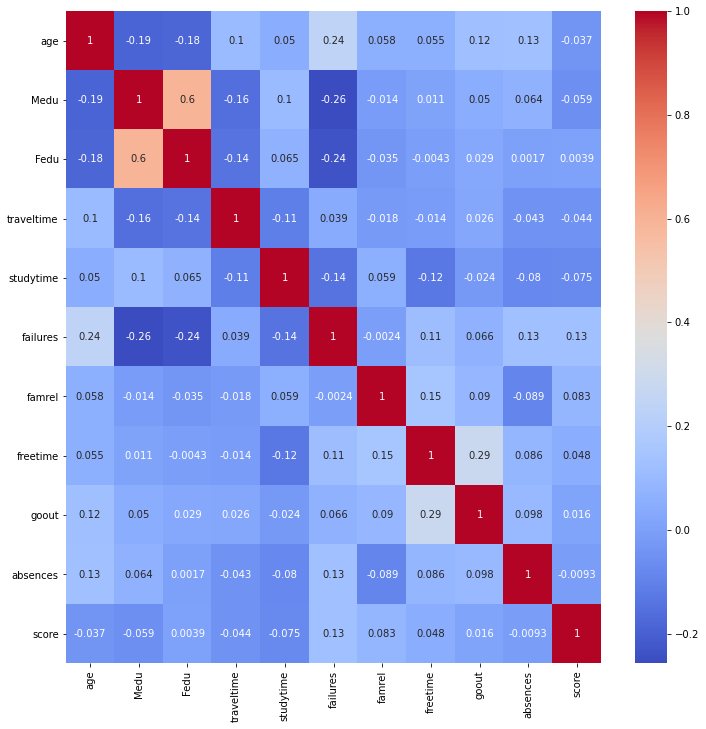

In [1145]:
sns.heatmap(correl4, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(12, 12)

Видно, что стало слишком скорлерировано значение Fedu и Medu. Оставим только одно из них. Например, Medu, так как там было меньше пропусков изначально.

In [1146]:
del stud2['Medu']

In [1147]:
correl5 = stud2.corr()
correl5

,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,absences,score
age,1.000000,-0.181582,0.102870,0.050403,0.242736,0.058240,0.055268,0.124409,0.130520,-0.036898
Fedu,-0.181582,1.000000,-0.143669,0.065017,-0.236825,-0.035187,-0.004313,0.028926,0.001655,0.003889
traveltime,0.102870,-0.143669,1.000000,-0.108647,0.038927,-0.018305,-0.014431,0.026207,-0.042542,-0.044253
studytime,0.050403,0.065017,-0.108647,1.000000,-0.141254,0.059104,-0.124771,-0.024374,-0.080322,-0.074895
failures,0.242736,-0.236825,0.038927,-0.141254,1.000000,-0.002397,0.113102,0.066406,0.128285,0.129576
famrel,0.058240,-0.035187,-0.018305,0.059104,-0.002397,1.000000,0.154583,0.090298,-0.088980,0.083491
freetime,0.055268,-0.004313,-0.014431,-0.124771,0.113102,0.154583,1.000000,0.285626,0.086246,0.048296
goout,0.124409,0.028926,0.026207,-0.024374,0.066406,0.090298,0.285626,1.000000,0.098289,0.016417
absences,0.130520,0.001655,-0.042542,-0.080322,0.128285,-0.088980,0.086246,0.098289,1.000000,-0.009254
score,-0.036898,0.003889,-0.044253,-0.074895,0.129576,0.083491,0.048296,0.016417,-0.009254,1.000000


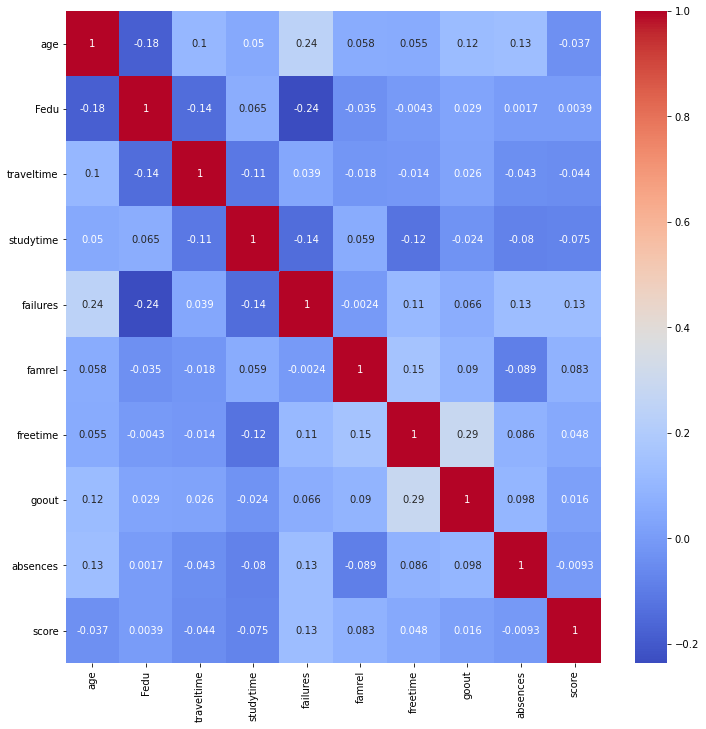

In [1148]:
sns.heatmap(correl5, annot = True, cmap = 'coolwarm')
plt.gcf().set_size_inches(12, 12)

Теперь все данные выглядят хорошо. Почти все числовые данные слабоскоррелированы с рейтингом и будут использоваться в дальнейшем для построения модели.

## Анализ номинативных переменных

In [1149]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 3))
    sns.boxplot(x=column, y='score', 
                data=stud2.loc[stud2.loc[:, column].isin(stud2.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=30)
    ax.set_title('Boxplot for ' + column)
    plt.show()

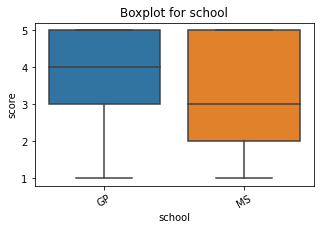

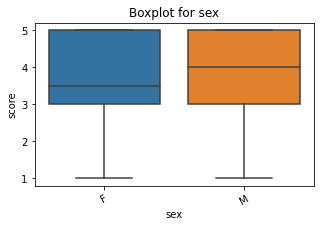

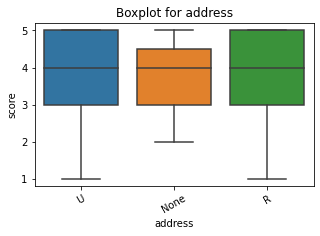

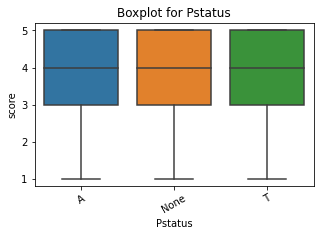

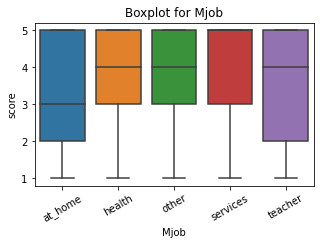

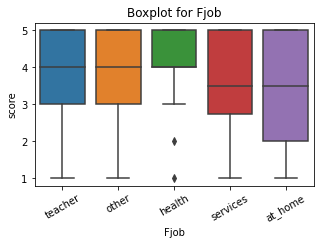

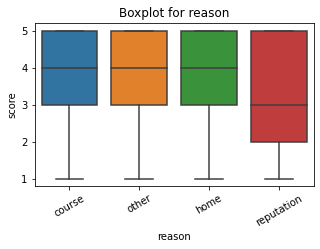

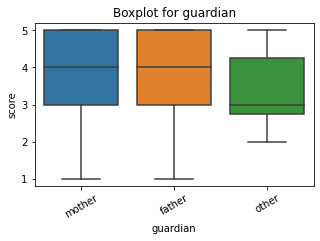

In [1150]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 

In [1151]:
def get_stat_dif(column):
    cols = stud2.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud2.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud2.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1152]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки reason


Как мы видим, серьёзно отличаются два параметра: sex и  reason. Оставим эти переменные в датасете для дальнейшего построения модели. 

## Выводы

Итак, в результате EDA для анализа влияния параметров учеников на экспертную оценку экзамена по математике были получены следующие выводы:

- В данных достаточно много пустых значений, только несколько столбцов было заполнено в достаточном количестве случаев.
- Выбросы найдены в достаточно большом количестве столбцов, а из-за ограниченного количества данных, удалять их было неправильно. Пришлось корректировать выбросы.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, reason, age, Fedu, traveltime, studytime, failures, famrel, freetime, goout, abscences.